In [8]:
import os 
import pandas as pd


In [9]:
data_path = os.path.join('..', 'data', 'single_station_data.csv')
data = pd.read_csv(data_path, parse_dates= ['date'])

In [10]:
print(data.shape)
data.head()

(87698, 12)


,number_sta,lat,lon,height_sta,date,dd,ff,precip,hu,td,t,psl
0,1034004,45.77,5.69,330.0,2016-01-01 00:00:00,0.0,0.0,0.0,100.0,279.15,279.15,NaN
1,1034004,45.77,5.69,330.0,2016-01-01 00:06:00,0.0,0.0,0.0,100.0,279.05,279.05,NaN
2,1034004,45.77,5.69,330.0,2016-01-01 00:12:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN
3,1034004,45.77,5.69,330.0,2016-01-01 00:18:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN
4,1034004,45.77,5.69,330.0,2016-01-01 00:24:00,0.0,0.0,0.0,100.0,278.85,278.85,NaN


El primer paso a realizar es un análisis exploratorio de los datos por lo tanto tendremos una vista general

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87698 entries, 0 to 87697
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   number_sta  87698 non-null  int64         
 1   lat         87698 non-null  float64       
 2   lon         87698 non-null  float64       
 3   height_sta  87698 non-null  float64       
 4   date        87698 non-null  datetime64[ns]
 5   dd          87693 non-null  float64       
 6   ff          87693 non-null  float64       
 7   precip      87698 non-null  float64       
 8   hu          87694 non-null  float64       
 9   td          87694 non-null  float64       
 10  t           87695 non-null  float64       
 11  psl         0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 8.0 MB
None


In [12]:
print(data.describe())

       number_sta           lat           lon  height_sta  \
count     87698.0  8.769800e+04  8.769800e+04     87698.0   
mean    1034004.0  4.577000e+01  5.690000e+00       330.0   
min     1034004.0  4.577000e+01  5.690000e+00       330.0   
25%     1034004.0  4.577000e+01  5.690000e+00       330.0   
50%     1034004.0  4.577000e+01  5.690000e+00       330.0   
75%     1034004.0  4.577000e+01  5.690000e+00       330.0   
max     1034004.0  4.577000e+01  5.690000e+00       330.0   
std           0.0  1.421094e-14  1.776367e-15         0.0   

                                date            dd            ff  \
count                          87698  87693.000000  87693.000000   
mean   2016-07-02 01:31:24.554722048    177.732772      1.802017   
min              2016-01-01 00:00:00      0.000000      0.000000   
25%              2016-04-01 08:25:30     50.000000      0.900000   
50%              2016-07-02 07:03:00    180.000000      1.500000   
75%              2016-10-01 15:28:30    31

A primera vista pare ser que la columna psl o tiene valores 0 o nan, vamos a validar esa información

In [13]:
print(data['psl'].unique().tolist())

[nan]


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

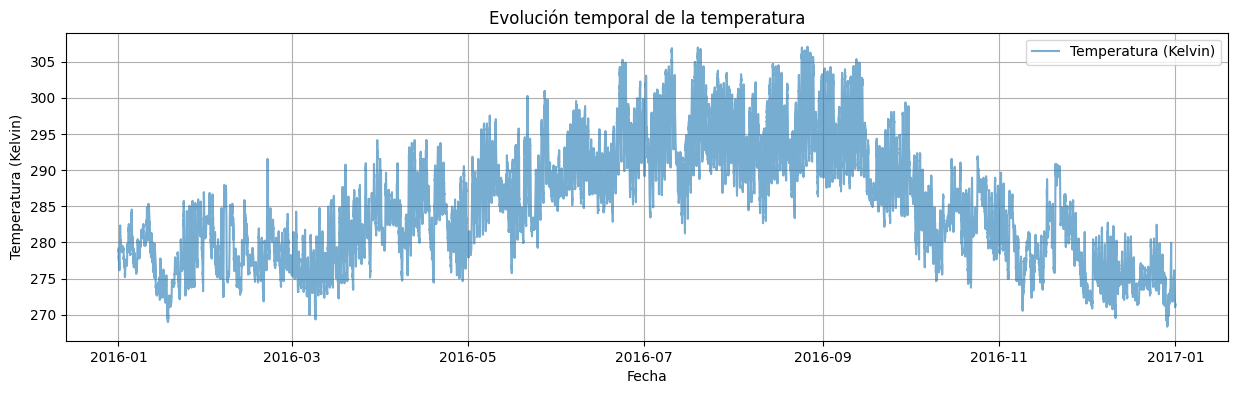

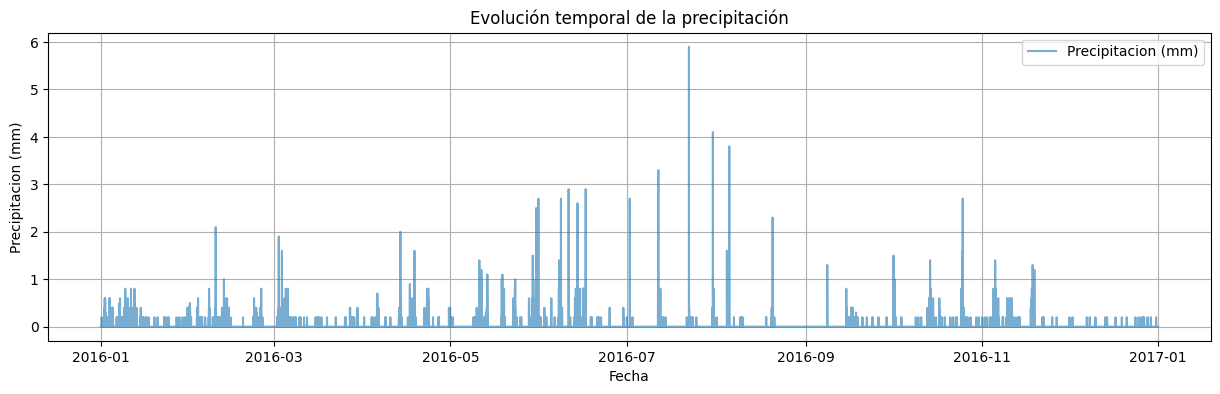

In [15]:
plt.figure(figsize=(15,4))
plt.plot(data['date'], data['t'], label = 'Temperatura (Kelvin)', alpha = 0.6)
plt.title('Evolución temporal de la temperatura')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (Kelvin)')
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(15,4))
plt.plot(data['date'], data['precip'], label = 'Precipitacion (mm)', alpha = 0.6)
plt.title('Evolución temporal de la precipitación')
plt.xlabel('Fecha')
plt.ylabel('Precipitacion (mm)')
plt.grid(True)
plt.legend()
plt.show()


Mensual y Anual

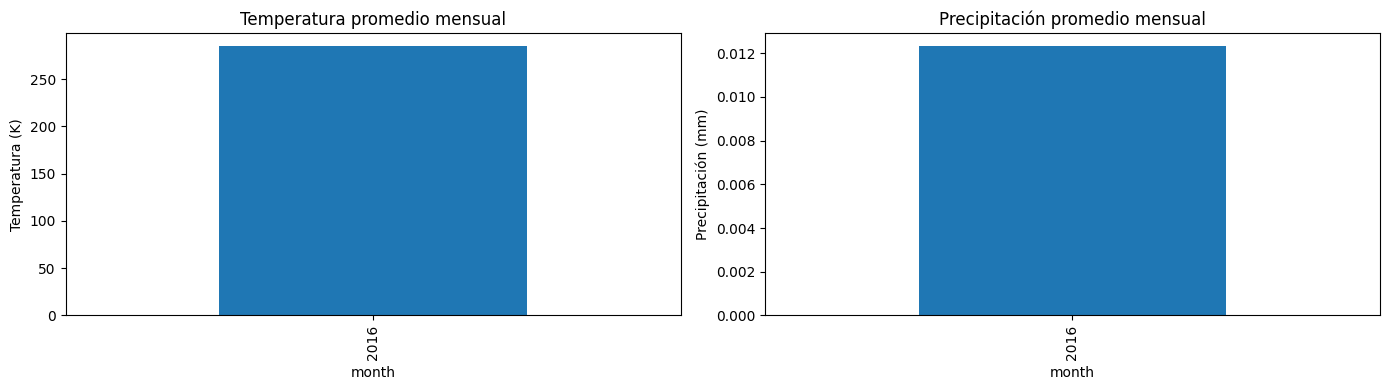

In [16]:
data['year']=data['date'].dt.year
data['month']=data['date'].dt.year

monthly_temp = data.groupby('month')['t'].mean()
monthly_precip = data.groupby('month')['precip'].mean()

fig, ax = plt.subplots(1,2, figsize=(14,4))
monthly_temp.plot(kind='bar', ax=ax[0], title='Temperatura promedio mensual')
monthly_precip.plot(kind='bar', ax=ax[1], title='Precipitación promedio mensual')
ax[0].set_ylabel('Temperatura (K)')
ax[1].set_ylabel('Precipitación (mm)')
plt.tight_layout()
plt.show()


Vamos a validar como se relacionan las variables 

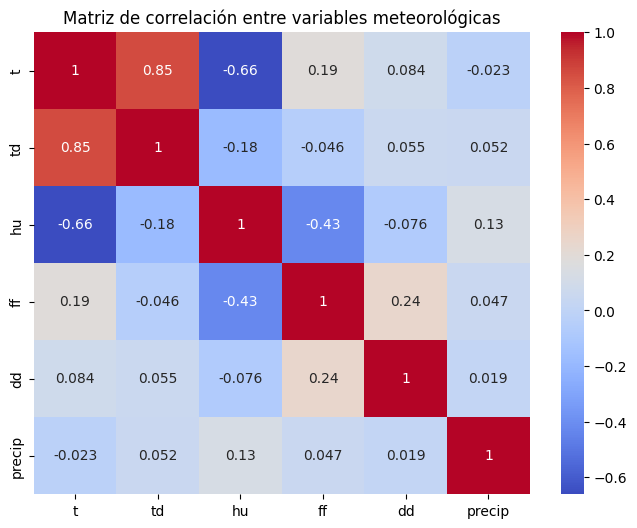

In [17]:
corr = data[['t', 'td', 'hu', 'ff', 'dd', 'precip']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables meteorológicas')
plt.show()

In [18]:
# Ver cuántos valores faltantes hay
missing = data.isna().sum()
print(missing[missing > 0])


dd         5
ff         5
hu         4
td         4
t          3
psl    87698
dtype: int64
